# <div style="text-align: center"> Trabalho de Computação - Análise Airbnb </div>
## <div style="text-align: center"> FGV/EPGE </div>



## <div style="text-align: right"> Louise Alves e Lucas Marques  </div>


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from unidecode import unidecode

In [2]:
## FONTE DO DADO http://insideairbnb.com/get-the-data.html
df = pd.read_csv('https://raw.githubusercontent.com/LucasFMarques/Trabalho_Computacao_20.2/main/data/listings_RJ.csv')

In [3]:
#Pegando 5 valores de uma amostra do dataframe para conhecer melhor o dado a ser trabalhado..
df.sample(5)

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
7749,10098795,Carnaval Rio de Janeiro,47064581,Danilo,NaN,Laranjeiras,-22.93576,-43.18831,Entire home/apt,800,1,0,NaN,NaN,1,0
17008,16140005,Carnaval em Ipanema,13007550,Fernanda Maria,NaN,Ipanema,-22.98567,-43.19359,Entire home/apt,1379,5,1,2017-03-01,0.02,2,0
21610,23899214,Pensionato Feminino 402.1 individual- WI-fi,158933362,Cássia Ou Wellington,NaN,Botafogo,-22.95054,-43.18000,Private room,51,1,14,2019-10-08,0.83,12,0
11191,12879783,Alugo Apart com vista Mar na Barra,32007453,Hilda,NaN,Barra da Tijuca,-23.00965,-43.35596,Entire home/apt,942,3,1,2016-05-27,0.02,1,0
6940,9104312,Ipanema Luxury - Ocean Front,40650139,Carlos Alberto,NaN,Ipanema,-22.98555,-43.20605,Entire home/apt,2501,3,0,NaN,NaN,4,364


In [4]:
#Olhando cada coluna, seu tipo e a quantidade de valores não nulos em cada coluna 
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35255 entries, 0 to 35254
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              35255 non-null  int64  
 1   name                            35197 non-null  object 
 2   host_id                         35255 non-null  int64  
 3   host_name                       35249 non-null  object 
 4   neighbourhood_group             0 non-null      float64
 5   neighbourhood                   35255 non-null  object 
 6   latitude                        35255 non-null  float64
 7   longitude                       35255 non-null  float64
 8   room_type                       35255 non-null  object 
 9   price                           35255 non-null  int64  
 10  minimum_nights                  35255 non-null  int64  
 11  number_of_reviews               35255 non-null  int64  
 12  last_review                     

In [5]:
print(df.neighbourhood.value_counts()[:10])

Copacabana                  9149
Barra da Tijuca             3929
Ipanema                     2949
Jacarepaguá                 2028
Botafogo                    1755
Recreio dos Bandeirantes    1654
Leblon                      1599
Santa Teresa                1151
Centro                       987
Flamengo                     897
Name: neighbourhood, dtype: int64


### Aqui podemos verificar os 10 lugares que possuem maior disponibilidade de quartos, apartamentos ou casas. Não é difícil perceber que como um dos maiores pontos turísticos da cidade do Rio, os bairros da Zona Sul abrigam um maior número de estadias.

In [6]:
#Verificando algumas propriedades estatísticas das colunas numéricas
df.iloc[:,3:].describe()

,neighbourhood_group,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
count,0.0,35255.000000,35255.000000,35255.000000,35255.000000,35255.000000,20415.000000,35255.000000,35255.000000
mean,NaN,-22.965150,-43.252554,716.374443,4.958587,9.576854,0.513216,5.109828,172.849014
std,NaN,0.034914,0.097055,2268.685039,22.308987,25.598324,0.707440,17.071796,154.342749
min,NaN,-23.073400,-43.737090,0.000000,1.000000,0.000000,0.010000,1.000000,0.000000
25%,NaN,-22.984560,-43.319890,153.000000,1.000000,0.000000,0.100000,1.000000,0.000000
50%,NaN,-22.970650,-43.199140,298.000000,2.000000,1.000000,0.210000,1.000000,162.000000
75%,NaN,-22.946930,-43.186650,617.000000,4.000000,6.000000,0.620000,3.000000,362.000000
max,NaN,-22.750380,-43.104620,131612.000000,1123.000000,407.000000,8.880000,200.000000,365.000000


### Com o describe a gente pode observar algumas características sobre as estatísticas de algumas colunas

### Acima com o comando info() podemos verificar que a coluna **neighbourhood_group** que deveria corresponder às zonas de cada bairro (zona sul, norte, centro, etc) está completamente nula. Com o intuito de melhorar nossa análise, posteriormente iremos fazer um enriquecimento dessa coluna usando com base a coluna de bairros

In [7]:
limites_bairros = pd.read_csv('https://raw.githubusercontent.com/LucasFMarques/Trabalho_Computacao_20.2/main/data/Limite_de_Bairros_RJ.csv')
print(limites_bairros.columns)

Index(['OBJECTID', 'Área', 'NOME', 'REGIAO_ADM', 'AREA_PLANE', 'CODBAIRRO',
       'CODRA', 'CODBNUM', 'LINK', 'RP', 'Cod_RP', 'CODBAIRRO_LONG',
       'SHAPESTArea', 'SHAPESTLength'],
      dtype='object')


In [8]:
limites_bairros.head()

,OBJECTID,Área,NOME,REGIAO_ADM,AREA_PLANE,CODBAIRRO,CODRA,CODBNUM,LINK,RP,Cod_RP,CODBAIRRO_LONG,SHAPESTArea,SHAPESTLength
0,325,1.705685e+06,Paquetá,PAQUETA,1,13,21,13,Paqueta&area=013 ...,Centro,1.1,13,1.705685e+06,24841.426669
1,326,4.056403e+06,Freguesia (Ilha),ILHA DO GOVERNADOR,3,98,20,98,Freguesia (Ilha) &area=98 ...,Ilha do Governador,3.7,98,4.056403e+06,18303.595717
2,327,9.780465e+05,Bancários,ILHA DO GOVERNADOR,3,97,20,97,Bancários &area=97 ...,Ilha do Governador,3.7,97,9.780465e+05,7758.781282
3,328,1.895742e+07,Galeão,ILHA DO GOVERNADOR,3,104,20,104,Galeão &area=104 ...,Ilha do Governador,3.7,104,1.895742e+07,21510.059220
4,329,1.672546e+06,Tauá,ILHA DO GOVERNADOR,3,101,20,101,Tauá &area=101 ...,Ilha do Governador,3.7,101,1.672546e+06,8246.109606


### A coluna **RP** é a coluna correspondente às Regiões de Planejamento que já é algo bem próximo das separações por áreas que queremos.
#### Portanto iremos enriquecer o dataset inicial com essa dado usando uma função de merge.

In [9]:
drop_cols = ['OBJECTID', 'Área', 'REGIAO_ADM', 'AREA_PLANE', 'CODBAIRRO',
       'CODRA', 'CODBNUM', 'LINK', 'Cod_RP', 'CODBAIRRO_LONG',
       'SHAPESTArea', 'SHAPESTLength']

limites_bairros.drop(columns=drop_cols, inplace=True)

In [10]:
#Normalização do nome dos bairros para evitar diferença na escrita entre uma base e outra
df["bairro_decode"] = df.neighbourhood.apply(lambda x: unidecode(str(x).lower().strip()))
limites_bairros['bairro'] = limites_bairros.NOME.apply(lambda x: unidecode(str(x).lower().strip()))

In [11]:
print(df.bairro_decode.head())

0    copacabana
1       ipanema
2    copacabana
3       ipanema
4       ipanema
Name: bairro_decode, dtype: object


In [12]:
print(limites_bairros.bairro.head())

0             paqueta
1    freguesia (ilha)
2           bancarios
3              galeao
4                taua
Name: bairro, dtype: object


In [13]:
df_complete = df.merge(limites_bairros, how='left',left_on='bairro_decode',right_on="bairro")
print(df_complete.columns)

Index(['id', 'name', 'host_id', 'host_name', 'neighbourhood_group',
       'neighbourhood', 'latitude', 'longitude', 'room_type', 'price',
       'minimum_nights', 'number_of_reviews', 'last_review',
       'reviews_per_month', 'calculated_host_listings_count',
       'availability_365', 'bairro_decode', 'NOME', 'RP', 'bairro'],
      dtype='object')


In [14]:
#removendo variaveis desnecessárias
df_complete['neighbourhood_group'] = df_complete.RP
df_complete.drop(columns=['bairro', "NOME", 'RP', 'bairro_decode'], inplace=True)

In [15]:
print(df_complete.neighbourhood_group.unique())

['Zona Sul' 'Barra da Tijuca' 'Centro' 'Campo Grande' 'Tijuca' 'Méier'
 'Jacarepaguá' 'Madureira' 'Bangu' 'Ramos' 'Penha' 'Guaratiba' 'Inhaúma'
 'Ilha do Governador' 'Santa Cruz' 'Pavuna']


#### Vimos que mesmo depois do nosso merge ainda era possível melhorar a classificação das áreas da cidade.

In [16]:
zonas_dict = {"Tijuca":"Zona Norte",
             "Inhaúma":"Zona Norte",
             "Méier":"Zona Norte",
             "Ramos":"Zona Norte",
             "Penha":"Zona Norte",
             "Ilha do Governador":"Zona Norte",
             "Madureira":"Zona Norte",
             "Pavuna":"Zona Norte",
             "Bangu":"Zona Oeste",
             "Campo Grande":"Zona Oeste",
             "Bangu":"Zona Oeste",
             "Jacarepaguá":"Zona Oeste",
             "Santa Cruz":"Zona Oeste",
             "Barra da Tijuca":"Zona Oeste",
             "Guaratiba":"Zona Oeste"}
df_complete = df_complete.replace({'neighbourhood_group': zonas_dict})

print('Classificação de áreas após os últimos comandos: ', ", ".join(df_complete.neighbourhood_group.unique()), '.', sep='')

Classificação de áreas após os últimos comandos: Zona Sul, Zona Oeste, Centro, Zona Norte.


In [17]:
print(df_complete.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 35255 entries, 0 to 35254
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              35255 non-null  int64  
 1   name                            35197 non-null  object 
 2   host_id                         35255 non-null  int64  
 3   host_name                       35249 non-null  object 
 4   neighbourhood_group             35255 non-null  object 
 5   neighbourhood                   35255 non-null  object 
 6   latitude                        35255 non-null  float64
 7   longitude                       35255 non-null  float64
 8   room_type                       35255 non-null  object 
 9   price                           35255 non-null  int64  
 10  minimum_nights                  35255 non-null  int64  
 11  number_of_reviews               35255 non-null  int64  
 12  last_review                     

In [18]:
price_min = df_complete.price.min()
price_max = df_complete.price.max()

df_complete[(df_complete.price == price_min) | (df_complete.price == price_max)]

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
19031,20269038,"APT ESPIGÃO ,MENSAL OU ESTADIAS PROLONGADA13°a...",100693784,Aida,Zona Oeste,Jacarepaguá,-22.97320,-43.41019,Entire home/apt,0,3,4,2019-05-12,0.19,4,362
19499,21144730,Rio Copacabana terraced BB-Red Room,107465765,Paul,Zona Sul,Copacabana,-22.96854,-43.18862,Hotel room,0,3,1,2018-09-11,0.04,4,364
19515,21174310,Rio Copacabana Terraced BB- green room,107465765,Paul,Zona Sul,Copacabana,-22.96869,-43.18838,Private room,0,3,0,NaN,NaN,4,364
19516,21174613,Rio Copacabana Terraced BB- white room,107465765,Paul,Zona Sul,Copacabana,-22.96981,-43.18815,Hotel room,0,3,0,NaN,NaN,4,1
19519,21180262,Rio Copacabana terraced BB Green Room,3477417,Paolo,Zona Sul,Copacabana,-22.96951,-43.18890,Private room,0,2,1,2019-10-17,0.11,4,364
19520,21180521,BB Rio Copacabana- Red Room,3477417,Paolo,Zona Sul,Copacabana,-22.96951,-43.18890,Private room,0,3,3,2020-02-25,0.14,4,364
19540,21202521,Rio Copacabana terraced BB White Room,3477417,Paolo,Zona Sul,Copacabana,-22.96951,-43.18890,Private room,0,3,0,NaN,NaN,4,364
29089,39212507,B&B Linda House - Double bedroom between Copac...,247378002,Loris,Zona Sul,Copacabana,-22.98217,-43.19344,Private room,131612,1,0,NaN,NaN,7,110
29415,39630154,Rio011 - 6 bedroom villa in Alto da Boa Vista,22805631,Latin Exclusive,Zona Norte,Alto da Boa Vista,-22.96575,-43.29258,Entire home/apt,131612,1,0,NaN,NaN,46,0


In [19]:
for col in ['neighbourhood', 'neighbourhood_group', 'room_type', 'price']:
    print(col.upper(), '\n')
    print(df_complete[col].value_counts()[:6],'\n\n',df_complete[col].describe(), sep='')
    print('\n\n',"##"*12, '\n', sep='')

NEIGHBOURHOOD 

Copacabana                  9149
Barra da Tijuca             3929
Ipanema                     2949
Jacarepaguá                 2028
Botafogo                    1755
Recreio dos Bandeirantes    1654
Name: neighbourhood, dtype: int64

count          35255
unique           156
top       Copacabana
freq            9149
Name: neighbourhood, dtype: object


########################

NEIGHBOURHOOD_GROUP 

Zona Sul      20396
Zona Oeste     9644
Centro         2632
Zona Norte     2583
Name: neighbourhood_group, dtype: int64

count        35255
unique           4
top       Zona Sul
freq         20396
Name: neighbourhood_group, dtype: object


########################

ROOM_TYPE 

Entire home/apt    25172
Private room        9131
Shared room          780
Hotel room           172
Name: room_type, dtype: int64

count               35255
unique                  4
top       Entire home/apt
freq                25172
Name: room_type, dtype: object


########################

PRICE 

20

In [20]:
print(df_complete.room_type.unique())

['Entire home/apt' 'Private room' 'Shared room' 'Hotel room']


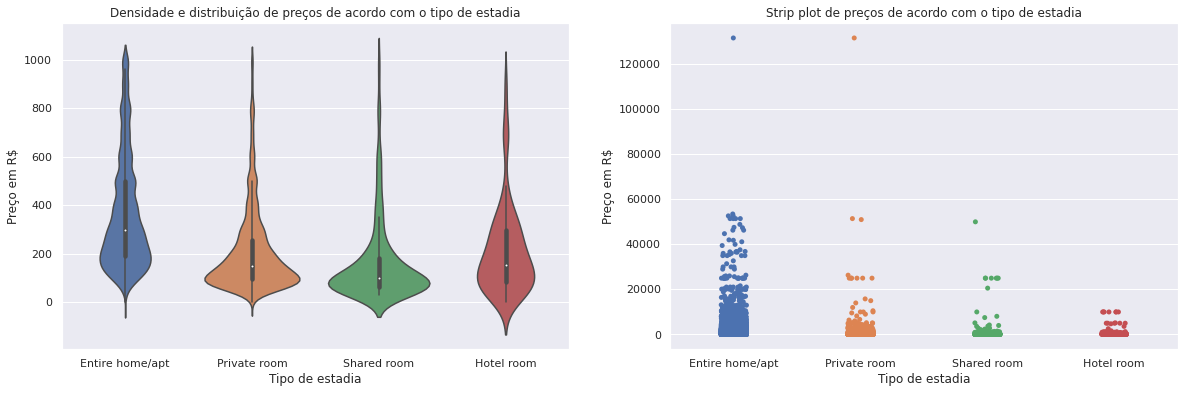

In [21]:
sns.set()
# A gente pode observar pela nossa tabela que temos muitos valores extremos
### no entanto, para podermos fazer uma melhor análise visual,
### focamos nos valores abaixo de 1000 para o grafico de densidade, 
### enquanto o strip plot nos mostra a distribuição completa dessas estadias
fig, (violin_rt, strip_rt) = plt.subplots(nrows=1, ncols=2, figsize=(20, 6))
sns.violinplot(data=df_complete[df_complete.price < 1000], 
                     x='room_type', y='price', ax=violin_rt)
violin_rt.set_title('Densidade e distribuição de preços de acordo com o tipo de estadia')
violin_rt.set_xlabel("Tipo de estadia")
violin_rt.set_ylabel("Preço em R$")

sns.stripplot(data=df_complete,x='room_type',y='price',jitter=True, ax=strip_rt)
strip_rt.set_title('Strip plot de preços de acordo com o tipo de estadia')
strip_rt.set_xlabel("Tipo de estadia")
strip_rt.set_ylabel("Preço em R$")

plt.show()

In [22]:
print(df_complete.neighbourhood_group.unique())

['Zona Sul' 'Zona Oeste' 'Centro' 'Zona Norte']


In [23]:
## Aqui vamos explorar algumas estatísticas isoladas pela área e analisar suas relações
#Zona Sul
zs = df_complete.loc[df_complete['neighbourhood_group'] == 'Zona Sul']
price_zs = zs[['price']]
#Centro
centro = df_complete.loc[df_complete['neighbourhood_group'] == 'Centro']
price_centro = centro[['price']]
#Zona Oeste
zo = df_complete.loc[df_complete['neighbourhood_group'] == 'Zona Oeste']
price_zo = zo[['price']]
#Zona Norte
zn = df_complete.loc[df_complete['neighbourhood_group'] == 'Zona Norte']
price_zn = zn[['price']]
price_list_by_n = [price_zs, price_centro, price_zo, price_zn]


stats_area=[]
area = ['Zona Sul', 'Centro', 'Zona Oeste', 'Zona Norte']

for x in price_list_by_n:
    i = x.describe(percentiles = [.25, .50, .75])
    i = i.iloc[3:]
    i.reset_index(inplace = True)
    i.rename(columns = {'index':'Stats'}, inplace=True)
    stats_area.append(i)

stats_area[0].rename(columns = {'price':area[0]}, inplace = True)
stats_area[1].rename(columns = {'price':area[1]}, inplace = True)
stats_area[2].rename(columns = {'price':area[2]}, inplace = True)
stats_area[3].rename(columns = {'price':area[3]}, inplace = True)


stat_df = stats_area
stat_df = [df.set_index('Stats') for df in stat_df]
stat_df = stat_df[0].join(stat_df[1:])
print(stat_df)

       Zona Sul   Centro  Zona Oeste  Zona Norte
Stats                                           
min         0.0     31.0         0.0        31.0
25%       163.0     98.0       201.0        98.0
50%       295.0    168.0       400.0       201.0
75%       561.0    316.0       998.0       548.0
max    131612.0  52645.0     52645.0    131612.0


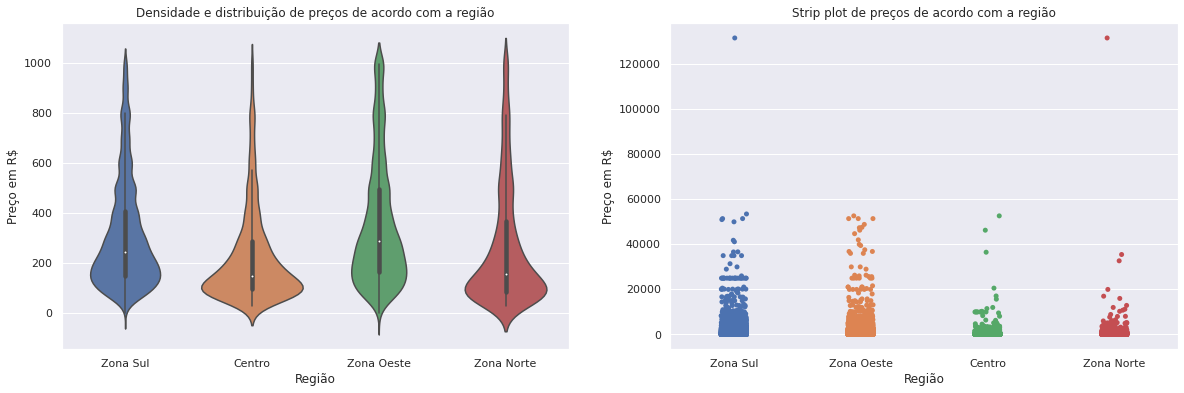

In [24]:
# Análogamente à análise acima faremos o mesmo para a região da estadia
sns.set()
fig, (violin_ng, strip_ng) = plt.subplots(nrows=1, ncols=2, figsize=(20, 6))
sns.violinplot(data=df_complete[df_complete.price < 1000], 
                     x='neighbourhood_group', y='price', ax=violin_ng)
violin_ng.set_title('Densidade e distribuição de preços de acordo com a região')
violin_ng.set_xlabel("Região")
violin_ng.set_ylabel("Preço em R$")

sns.stripplot(data=df_complete,x='neighbourhood_group',y='price',jitter=True, ax=strip_ng)
strip_ng.set_title('Strip plot de preços de acordo com a região')
strip_ng.set_xlabel("Região")
strip_ng.set_ylabel("Preço em R$")

plt.show()

In [25]:
top_5 = df_complete.neighbourhood.value_counts().iloc[:5].index
top5_df = df_complete.loc[(df_complete.neighbourhood == top_5[0]) | (df_complete.neighbourhood == top_5[1]) | 
                                                        (df_complete.neighbourhood == top_5[2]) | (df_complete.neighbourhood == top_5[3]) | 
                                                        (df_complete.neighbourhood == top_5[4])]

In [26]:
top_5

Index(['Copacabana', 'Barra da Tijuca', 'Ipanema', 'Jacarepaguá', 'Botafogo'], dtype='object')

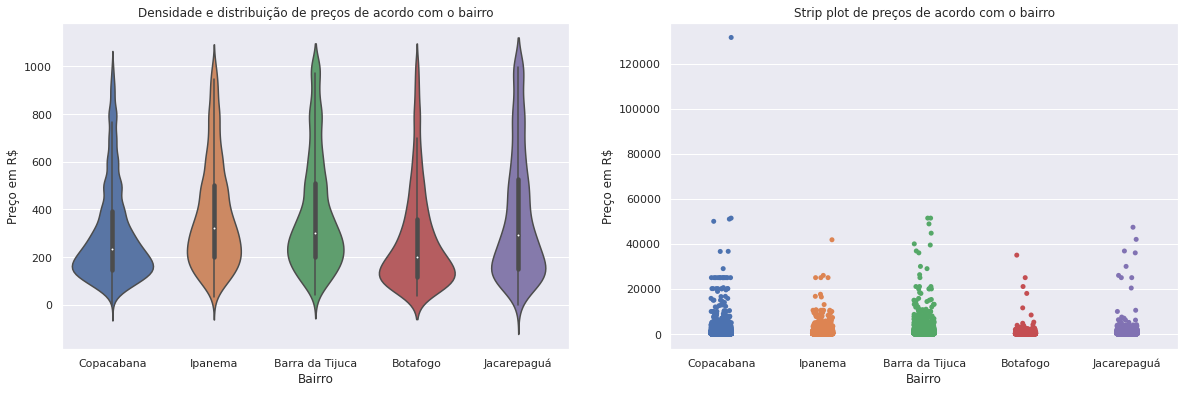

In [27]:
# Análogamente à análise acima faremos o mesmo para a região da estadia
sns.set()
fig, (violin_nb, strip_nb) = plt.subplots(nrows=1, ncols=2, figsize=(20, 6))
sns.violinplot(data=top5_df[top5_df.price < 1000], 
                     x='neighbourhood', y='price', ax=violin_nb)
violin_nb.set_title('Densidade e distribuição de preços de acordo com o bairro')
violin_nb.set_xlabel("Bairro")
violin_nb.set_ylabel("Preço em R$")

sns.stripplot(data=top5_df,x='neighbourhood',y='price',jitter=True, ax=strip_nb)
strip_nb.set_title('Strip plot de preços de acordo com o bairro')
strip_nb.set_xlabel("Bairro")
strip_nb.set_ylabel("Preço em R$")

plt.show()

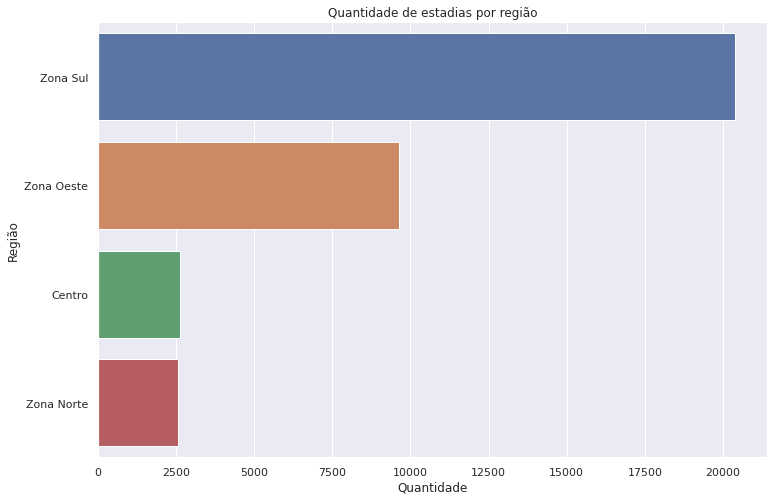

In [28]:
sns.set()
plt.figure(figsize=(12, 8))
sns.countplot(y='neighbourhood_group', data=df_complete)
plt.title('Quantidade de estadias por região')
plt.ylabel("Região")
plt.xlabel("Quantidade")
plt.show()

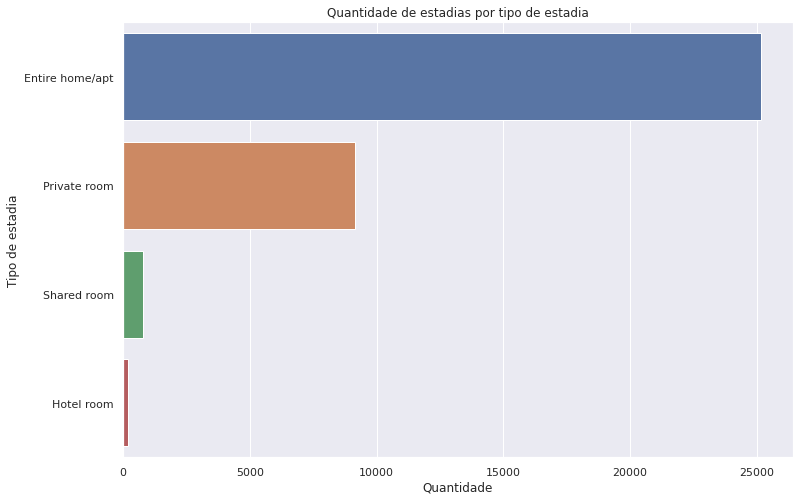

In [29]:
sns.set()
plt.figure(figsize=(12, 8))
sns.countplot(y='room_type', data=df_complete)
plt.title('Quantidade de estadias por tipo de estadia')
plt.ylabel("Tipo de estadia")
plt.xlabel("Quantidade")
plt.show()

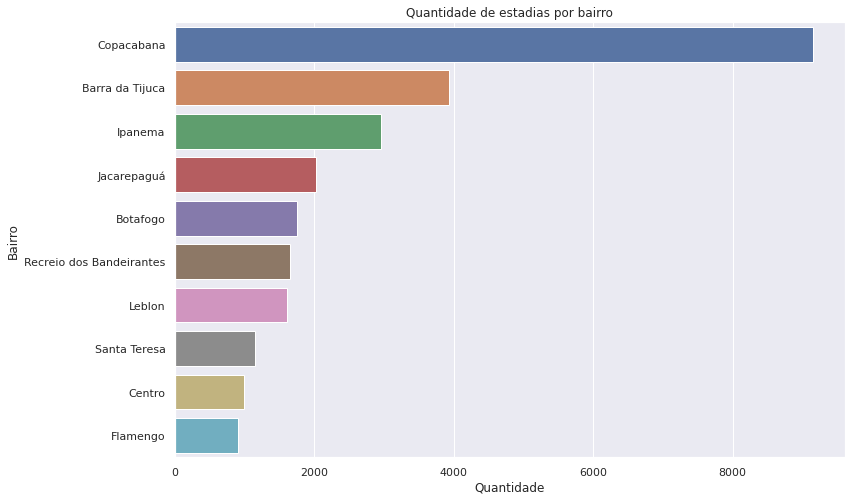

In [30]:
sns.set()
plt.figure(figsize=(12, 8))
sns.countplot(y='neighbourhood', data=df_complete, order=df_complete.neighbourhood.value_counts().iloc[:10].index)
plt.title('Quantidade de estadias por bairro')
plt.ylabel("Bairro")
plt.xlabel("Quantidade")
plt.show()

In [31]:
## Pegando os limites das coordenadas geográficas para visualizar em um gráfico
##https://osm.org/go/OVcURG
BBox = ((df_complete.longitude.min(), df.longitude.max(),df.latitude.min(), df.latitude.max()))
print(BBox)

(-43.73709, -43.104620000000004, -23.0734, -22.75038)


In [32]:
#https://raw.githubusercontent.com/LucasFMarques/Trabalho_Computacao_20.2/main/data/map_RJ.png LINK PARA IMAGEM
rj = plt.imread("data/map_RJ.png", 0)

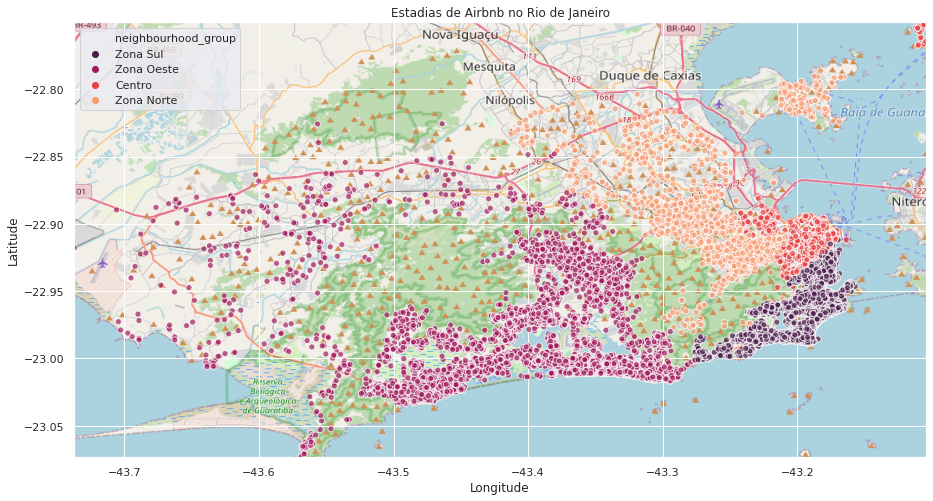

In [33]:
sns.set()
plt.figure(figsize=(16, 8))
ax = sns.scatterplot(data=df_complete, y='latitude', x='longitude',
                     hue='neighbourhood_group', palette="rocket",
                     linewidth=1, alpha=.7, zorder=1, legend='full')
ax.set_title('Estadias de Airbnb no Rio de Janeiro')
ax.set_xlim(BBox[0],BBox[1])
ax.set_ylim(BBox[2],BBox[3])
plt.xlabel("Longitude")
plt.ylabel("Latitude")
img = ax.imshow(rj, zorder=0, extent = BBox, aspect= 'equal')
plt.show()